In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Q:/Business Analytics/Data Science/Price Elasticity/trainingdata.csv')
df.head()

,Unnamed: 0,datedimensionid,storeitemdimensionid,locationdimensionid,actualdate,upc,mfsfilenumber,storenumber,fyweekendingdateint,category,...,THH68_Ring4,THH68_Ring5,ID,NAME,CompetitorsNearbyCount,CompetitorsAvgDriveTime,CompetitorsMinDriveTime,WalmartsNearbyCount,WalmartAvgDriveTime,WalmartMinDriveTime
0,0,20170205,113546,355,2017-02-05,306030535500,1872,1872,20170205,First Aid,...,0.0,0.0,1872.0,Waverly,13,21.084029,3.033353,3.0,17.721832,3.033353
1,1,20170219,113546,355,2017-02-19,306030535500,1872,1872,20170219,First Aid,...,0.0,0.0,1872.0,Waverly,13,21.084029,3.033353,3.0,17.721832,3.033353
2,2,20170312,113546,355,2017-03-12,306030535500,1872,1872,20170312,First Aid,...,0.0,0.0,1872.0,Waverly,13,21.084029,3.033353,3.0,17.721832,3.033353
3,3,20170430,113546,355,2017-04-30,306030535500,1872,1872,20170430,First Aid,...,0.0,0.0,1872.0,Waverly,13,21.084029,3.033353,3.0,17.721832,3.033353
4,4,20170507,113546,355,2017-05-07,306030535500,1872,1872,20170507,First Aid,...,0.0,0.0,1872.0,Waverly,13,21.084029,3.033353,3.0,17.721832,3.033353


In [3]:
df.shape

(40321, 634)

In [9]:
df2 = df[df['subcategory'].isin(['Shampoo', 'Toothpaste', 'Cold'])]
df2.shape


(4958, 634)

In [11]:
df2 = df2[['subcategory','quantity','netcost']]
df2.shape


(4958, 3)

In [13]:
df3 = df2[df2['subcategory'].isin(['Shampoo'])]
df3.shape


(1456, 3)

In [19]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='quantity ~ netcost', data=df3).fit()

# print the coefficients
lm.params

Intercept    0.422822
netcost      0.233427
dtype: float64

In [20]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'netcost': [df3.netcost.min(), df3.netcost.max()]})
X_new.head()


,netcost
0,0.000
1,26.752


In [21]:
preds = lm.predict (X_new)
preds

0    0.422822
1    6.667469
dtype: float64

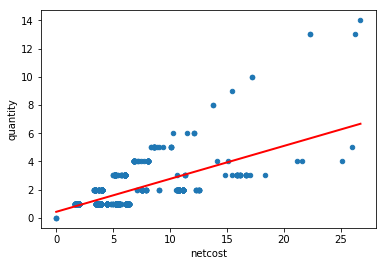

In [23]:
df3.plot(kind='scatter', x='netcost', y='quantity')
plt.plot(X_new, preds, c='red', linewidth=2)

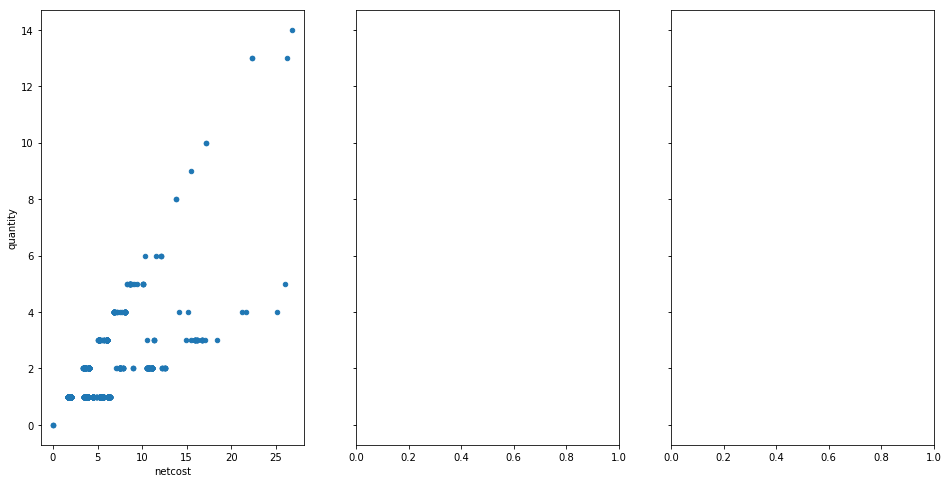

In [17]:
fig, axs = plt.subplots(1, 3, sharey=True)
df3.plot(kind='scatter', x='netcost', y='quantity', ax=axs[0], figsize=(16, 8))

In [24]:
lm.conf_int()

,0,1
Intercept,0.336238,0.509406
netcost,0.218850,0.248004


In [2]:
lm.pvalues

NameError: name 'lm' is not defined

In [1]:
lm.rsquared

NameError: name 'lm' is not defined